In [ ]:
import math
import random
import scipy
import statistics
import seaborn as sns
import numpy as np
import scipy.stats
from scipy import stats
from scipy.stats import f_oneway
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import plotly.graph_objects as go
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp as mc
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from mpl_toolkits import mplot3d

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


This is the data and analysis for the car variables

In [ ]:
new_data1 = pd.read_csv('drive/My Drive/FinalCarData.csv', sep=',', na_values=".")
new_data1

,a,b,c,d,e,Rep,Unnamed: 6,Unnamed: 7,std
0,-1,-1,-1,-1,-1,124,127,130,2.449490
1,1,-1,-1,-1,-1,113,113,117,1.885618
2,-1,1,-1,-1,-1,126,127,130,1.699673
3,1,1,-1,-1,-1,114,109,111,2.054805
4,-1,-1,1,-1,-1,115,113,106,3.858612
5,1,-1,1,-1,-1,110,117,117,3.299832
6,-1,1,1,-1,-1,111,117,115,2.494438
7,1,1,1,-1,-1,119,123,120,1.699673
8,-1,-1,-1,1,-1,198,197,195,1.247219
9,1,-1,-1,1,-1,186,187,190,1.699673


In [ ]:
new_data1.drop(columns=['Rep', 'Unnamed: 6', 'Unnamed: 7'])

,a,b,c,d,e,std
0,-1,-1,-1,-1,-1,2.449490
1,1,-1,-1,-1,-1,1.885618
2,-1,1,-1,-1,-1,1.699673
3,1,1,-1,-1,-1,2.054805
4,-1,-1,1,-1,-1,3.858612
5,1,-1,1,-1,-1,3.299832
6,-1,1,1,-1,-1,2.494438
7,1,1,1,-1,-1,1.699673
8,-1,-1,-1,1,-1,1.247219
9,1,-1,-1,1,-1,1.699673


In [ ]:
from pandas.core.indexes.datetimes import bdate_range
from pandas.core.dtypes.generic import ABCExtensionArray
aa=new_data1[['a']].to_numpy()
bb=new_data1[['b']].to_numpy()
cc=new_data1[['c']].to_numpy()
dd=new_data1[['d']].to_numpy()
ee=new_data1[['e']].to_numpy()
ab=aa*bb
bc=bb*cc
ac=aa*cc
ad=aa*dd
bd=bb*dd
cd=cc*dd
abc=aa*bb*cc
abd=aa*bb*dd
bcd=bb*cc*dd
acd=aa*cc*dd
abcd=aa*bb*cc*dd
ae=aa*ee
be=bb*ee
abe=aa*bb*ee
ce=cc*ee
ace=aa*cc*ee
bce=bb*cc*ee
abce=aa*bb*cc*ee
de=dd*ee
ade=aa*dd*ee
bde=bb*dd*ee
abde=aa*bb*dd*ee
cde=cc*dd*ee
acde=aa*cc*dd*ee
bcde=bb*cc*dd*ee
abcde=aa*bb*cc*dd*ee

In [ ]:
new_data1['ab']=ab
new_data1['bc']=bc
new_data1['ac']=ac
new_data1['ad']=ad
new_data1['bd']=bd
new_data1['cd']=cd
new_data1['abc']=abc
new_data1['abd']=abd
new_data1['acd']=acd
new_data1['bcd']=bcd
new_data1['abcd']=abcd
new_data1['ae']=ae
new_data1['be']=be
new_data1['abe']=abe
new_data1['ce']=ce
new_data1['ace']=ace
new_data1['bce']=bce
new_data1['abce']=abce
new_data1['de']=de
new_data1['ade']=ade
new_data1['bde']=bde
new_data1['abde']=abde
new_data1['cde']=cde
new_data1['acde']=acde
new_data1['bcde']=bcde
new_data1['abcde']=abcde
X=new_data1[['a', 'b', 'c', 'd', 'e', 'ab', 'bc', 'ac', 'ad', 'bd', 'cd', 'abc', 'abd', 'bcd', 'acd', 'ae', 'be', 'abe', 'ce', 'ace', 'bce', 'de', 'ade', 'bde', 'cde']]
X = sm.add_constant(X) # adding a constant
X

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,a,b,c,d,e,ab,bc,ac,ad,...,ae,be,abe,ce,ace,bce,de,ade,bde,cde
0,1.0,-1,-1,-1,-1,-1,1,1,1,1,...,1,1,-1,1,-1,-1,1,-1,-1,-1
1,1.0,1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,1,1,1,1,-1,1,1,-1,-1
2,1.0,-1,1,-1,-1,-1,-1,-1,1,1,...,1,-1,1,1,-1,1,1,-1,1,-1
3,1.0,1,1,-1,-1,-1,1,-1,-1,-1,...,-1,-1,-1,1,1,1,1,1,1,-1
4,1.0,-1,-1,1,-1,-1,1,-1,-1,1,...,1,1,-1,-1,1,1,1,-1,-1,1
5,1.0,1,-1,1,-1,-1,-1,-1,1,-1,...,-1,1,1,-1,-1,1,1,1,-1,1
6,1.0,-1,1,1,-1,-1,-1,1,-1,1,...,1,-1,1,-1,1,-1,1,-1,1,1
7,1.0,1,1,1,-1,-1,1,1,1,-1,...,-1,-1,-1,-1,-1,-1,1,1,1,1
8,1.0,-1,-1,-1,1,-1,1,1,1,-1,...,1,1,-1,1,-1,-1,-1,1,1,1
9,1.0,1,-1,-1,1,-1,-1,1,-1,1,...,-1,1,1,1,1,-1,-1,-1,1,1


In [ ]:
Y=new_data1[['std']]
Y

,std
0,2.449490
1,1.885618
2,1.699673
3,2.054805
4,3.858612
5,3.299832
6,2.494438
7,1.699673
8,1.247219
9,1.699673


In [ ]:
model = sm.OLS(Y, X)
res=model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    std   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     1.009
Date:                Wed, 26 Oct 2022   Prob (F-statistic):              0.547
Time:                        23:02:35   Log-Likelihood:                -23.848
No. Observations:                  32   AIC:                             99.70
Df Residuals:                       6   BIC:                             137.8
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4169      0.208     11.612      0.0

In [ ]:
model = ols('std ~ C(a) + C(b) + C(c) + C(d) + C(a):C(b) + C(b):C(c) + C(a):C(c) + C(a):C(d) + C(b):C(d) + C(c):C(d) + C(a):C(b):C(d)+ C(a):C(c):C(d) + C(b):C(c):C(d) + C(a):C(b):C(c) + C(a):C(b):C(c):C(d)', new_data1).fit()
aov_table = sm.stats.anova_lm(model, typ=3)
aov_table

,sum_sq,df,F,PR(>F)
Intercept,16.527348,1.0,12.715098,0.002579
C(a),2.321367,1.0,1.785913,0.200120
C(b),0.604670,1.0,0.465195,0.504961
C(c),0.056762,1.0,0.043669,0.837108
C(d),2.648566,1.0,2.037639,0.172674
C(a):C(b),1.176691,1.0,0.905271,0.355525
C(b):C(c),0.020674,1.0,0.015905,0.901212
C(a):C(c),0.916120,1.0,0.704805,0.413542
C(a):C(d),2.319046,1.0,1.784128,0.200334
C(b):C(d),3.860489,1.0,2.970016,0.104087


In [ ]:
eij=model.resid
eij

0    -4.251710e-01
1     5.345608e-01
2    -3.973825e-01
3    -5.272112e-02
4     1.222199e+00
5     8.334192e-01
6     8.389708e-01
7     6.141343e-01
8    -1.776357e-15
9    -1.775657e-01
10   -2.001060e+00
11    1.023236e+00
12   -2.472153e-01
13    4.654796e-01
14    9.130278e-01
15   -5.547682e-01
16    4.251710e-01
17   -5.345608e-01
18    3.973825e-01
19    5.272112e-02
20   -1.222199e+00
21   -8.334192e-01
22   -8.389708e-01
23   -6.141343e-01
24   -1.776357e-15
25    1.775657e-01
26    2.001060e+00
27   -1.023236e+00
28    2.472153e-01
29   -4.654796e-01
30   -9.130278e-01
31    5.547682e-01
dtype: float64

In [ ]:
N = len(eij)
c = list(range(0, N))
order = random.sample(c, N) 
print('order of observations/residuals is')
print(order)

order of observations/residuals is
[18, 23, 3, 31, 25, 13, 9, 26, 17, 1, 8, 27, 29, 6, 16, 5, 12, 14, 10, 30, 7, 21, 28, 11, 15, 19, 4, 22, 2, 24, 20, 0]


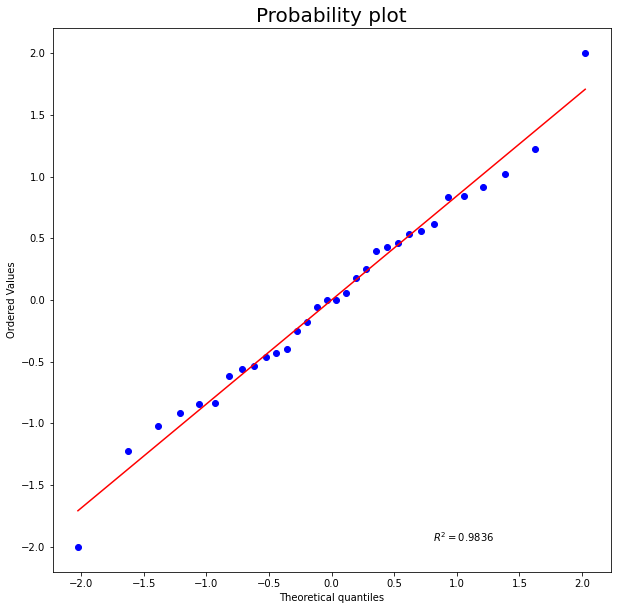

In [ ]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(model.resid, plot= plt, rvalue= True)
ax.set_title("Probability plot", fontsize= 20)
ax.set

plt.show()

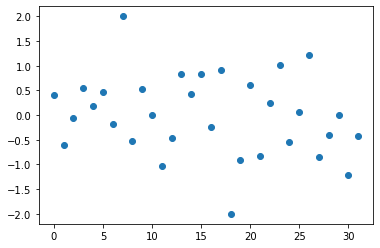

In [ ]:
eij=model.resid

x = c 
y = eij[order] 

plt.scatter(x, y)

In [ ]:
X.drop(columns=['cde','bde','ade','bce','abe','be','abd','bcd','cd','ac','ab'], inplace=True)

In [ ]:
model = sm.OLS(Y, X)
res=model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    std   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     3.684
Date:                Wed, 26 Oct 2022   Prob (F-statistic):            0.00624
Time:                        23:02:36   Log-Likelihood:                -27.930
No. Observations:                  32   AIC:                             85.86
Df Residuals:                      17   BIC:                             107.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4169      0.140     17.205      0.0

In [ ]:
X.drop(columns=['ae','acd','abc','ad','e'], inplace=True)

In [ ]:
model = sm.OLS(Y, X)
res=model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    std   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                     4.175
Date:                Wed, 26 Oct 2022   Prob (F-statistic):            0.00298
Time:                        23:02:36   Log-Likelihood:                -34.304
No. Observations:                  32   AIC:                             88.61
Df Residuals:                      22   BIC:                             103.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4169      0.151     16.038      0.0

In [ ]:
data2 = pd.read_csv('drive/My Drive/ContourData.csv', sep=',', na_values=".")
data2

,Height,Launch Dist,x1,x4,y
0,10,0,-1,-1,188
1,4,0,1,-1,55
2,10,12,-1,1,117
3,4,12,1,1,34
4,7,6,0,0,103
5,7,6,0,0,101
6,7,6,0,0,101
7,7,6,0,0,100


In [ ]:
df=data2
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Height       8 non-null      int64
 1   Launch Dist  8 non-null      int64
 2   x1           8 non-null      int64
 3   x4           8 non-null      int64
 4   y            8 non-null      int64
dtypes: int64(5)
memory usage: 448.0 bytes


In [ ]:
X=df[['x1', 'x4']]
X

,x1,x4
0,-1,-1
1,1,-1
2,-1,1
3,1,1
4,0,0
5,0,0
6,0,0
7,0,0


In [ ]:
xx=X.to_numpy()
poly= PolynomialFeatures(degree=2, interaction_only=False)
xxpd=pd.DataFrame(poly.fit_transform(xx), columns=['I', 'x1', 'x4', 'x1^2', 'x1x4', 'x4^2']) 
xxpd

,I,x1,x4,x1^2,x1x4,x4^2
0,1.0,-1.0,-1.0,1.0,1.0,1.0
1,1.0,1.0,-1.0,1.0,-1.0,1.0
2,1.0,-1.0,1.0,1.0,-1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0,0.0
6,1.0,0.0,0.0,0.0,0.0,0.0
7,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X=xxpd[['x1', 'x4', 'x1^2', 'x1x4', 'x4^2']]
X

,x1,x4,x1^2,x1x4,x4^2
0,-1.0,-1.0,1.0,1.0,1.0
1,1.0,-1.0,1.0,-1.0,1.0
2,-1.0,1.0,1.0,-1.0,1.0
3,1.0,1.0,1.0,1.0,1.0
4,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0


In [ ]:
Y=df[['y']]
regr1=LinearRegression()
regr1.fit(X,Y)
Yhat1=regr1.predict(X)
Yhat1

array([[188.  ],
       [ 55.  ],
       [117.  ],
       [ 34.  ],
       [101.25],
       [101.25],
       [101.25],
       [101.25]])

In [ ]:
X = sm.add_constant(X)
X

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,x1,x4,x1^2,x1x4,x4^2
0,1.0,-1.0,-1.0,1.0,1.0,1.0
1,1.0,1.0,-1.0,1.0,-1.0,1.0
2,1.0,-1.0,1.0,1.0,-1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0,0.0
6,1.0,0.0,0.0,0.0,0.0,0.0
7,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
model = sm.OLS(Y, X)
res=model.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     2277.
Date:                Wed, 26 Oct 2022   Prob (F-statistic):           1.49e-05
Time:                        23:02:36   Log-Likelihood:                -9.2663
No. Observations:                   8   AIC:                             28.53
Df Residuals:                       3   BIC:                             28.93
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        101.2500      0.629    160.931      0.0

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


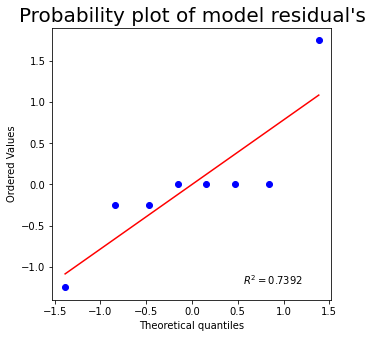

In [ ]:
fig = plt.figure(figsize= (5, 5))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(res.resid, plot= plt, rvalue= True)
ax.set_title("Probability plot of model residual's", fontsize= 20)
ax.set

plt.show()

Does not follow normal distribution

In [ ]:
def f(x, y):
    return 101.25 - 54*x - 23*y - 1.375*x**2 + 12.5 *x*y - 1.375*y**2

x = np.linspace(-1.5, 1.5, 30)
y = np.linspace(-1.5, 1.5, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

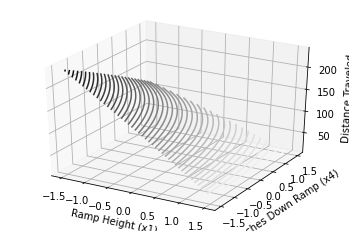

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('Ramp Height (x1)')
ax.set_ylabel('Inches Down Ramp (x4)')
ax.set_zlabel('Distance Traveled');

In [ ]:
z = data2.values #data values without heading
sh_0, sh_1 = z.shape # dimension of the data matrix or table
x1, x2 = np.linspace(-1, 1, sh_1), np.linspace(-1, 1, sh_1)
#print(x1)
#print(x2)
#print(z)
z2=data2[['Height','Launch Dist', 'y']]
fig = go.Figure(data=[go.Surface(z=z2, x=x1, y=x2)])
fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                  highlightcolor="limegreen", project_z=True))
fig.update_layout(title='Surface Plot', autosize=False,
                  scene_camera_eye=dict(x=1.87, y=0.88, z=-0.64),
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90)
)
fig.update_layout(scene = dict(
                    xaxis_title='Height',
                    yaxis_title='Inches Down Ramp',
                    zaxis_title='Distance Traveled'),
                   )
fig.show()